In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
### Missing value Handling 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Age'] = df['Age'].fillna(0)

In [11]:
df.drop(columns = ['Name','Ticket','SibSp','Parch','Cabin','Embarked'],inplace = True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [15]:
feature = df.drop(columns = ['Survived'])
target = df['Survived']

In [16]:
### Label Encoder
from sklearn.preprocessing import LabelEncoder

lab_sex = LabelEncoder()
feature['Sex_n'] = lab_sex.fit_transform(feature['Sex'])

In [17]:
feature.head()

,PassengerId,Pclass,Sex,Age,Fare,Sex_n
0,1,3,male,22.0,7.2500,1
1,2,1,female,38.0,71.2833,0
2,3,3,female,26.0,7.9250,0
3,4,1,female,35.0,53.1000,0
4,5,3,male,35.0,8.0500,1


In [18]:
feature1 = feature.drop(['Sex'],axis='columns')
feature1.head()

,PassengerId,Pclass,Age,Fare,Sex_n
0,1,3,22.0,7.2500,1
1,2,1,38.0,71.2833,0
2,3,3,26.0,7.9250,0
3,4,1,35.0,53.1000,0
4,5,3,35.0,8.0500,1


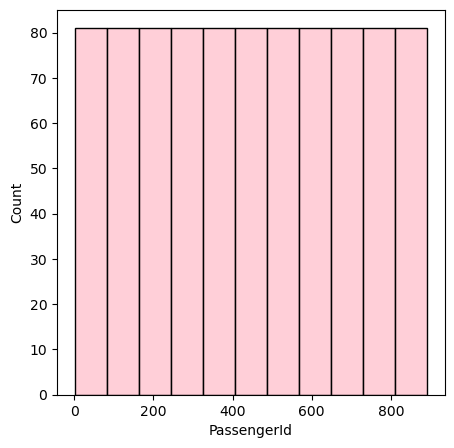

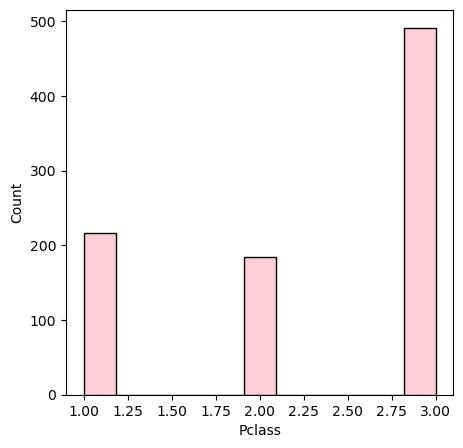

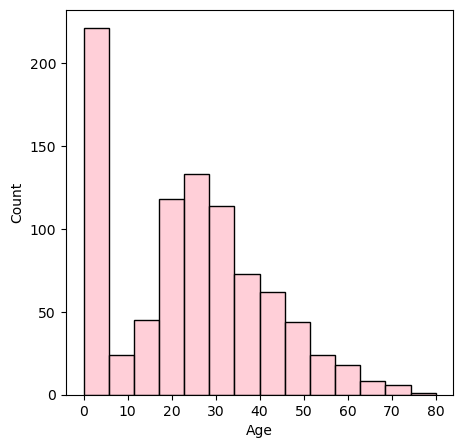

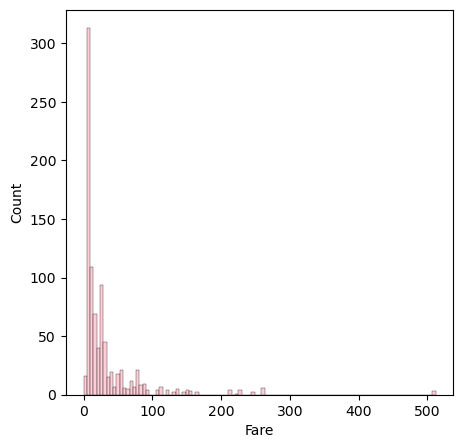

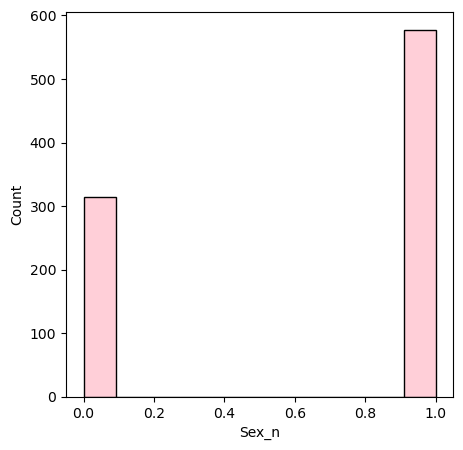

In [19]:
### Data Visualization 
for i in ['PassengerId','Pclass','Age','Fare','Sex_n']:
    plt.figure(figsize = (5,5))
    sns.histplot(x = feature1[i],color = 'pink')

<Axes: >

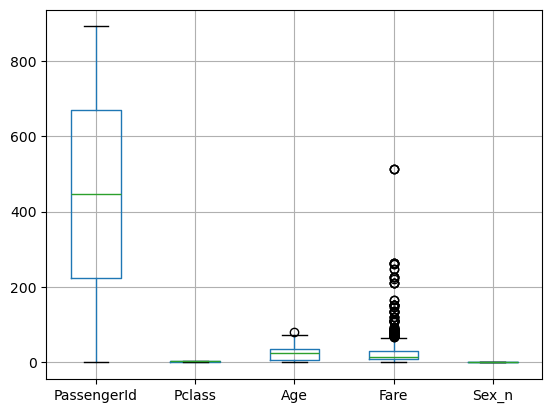

In [20]:
feature1.boxplot()

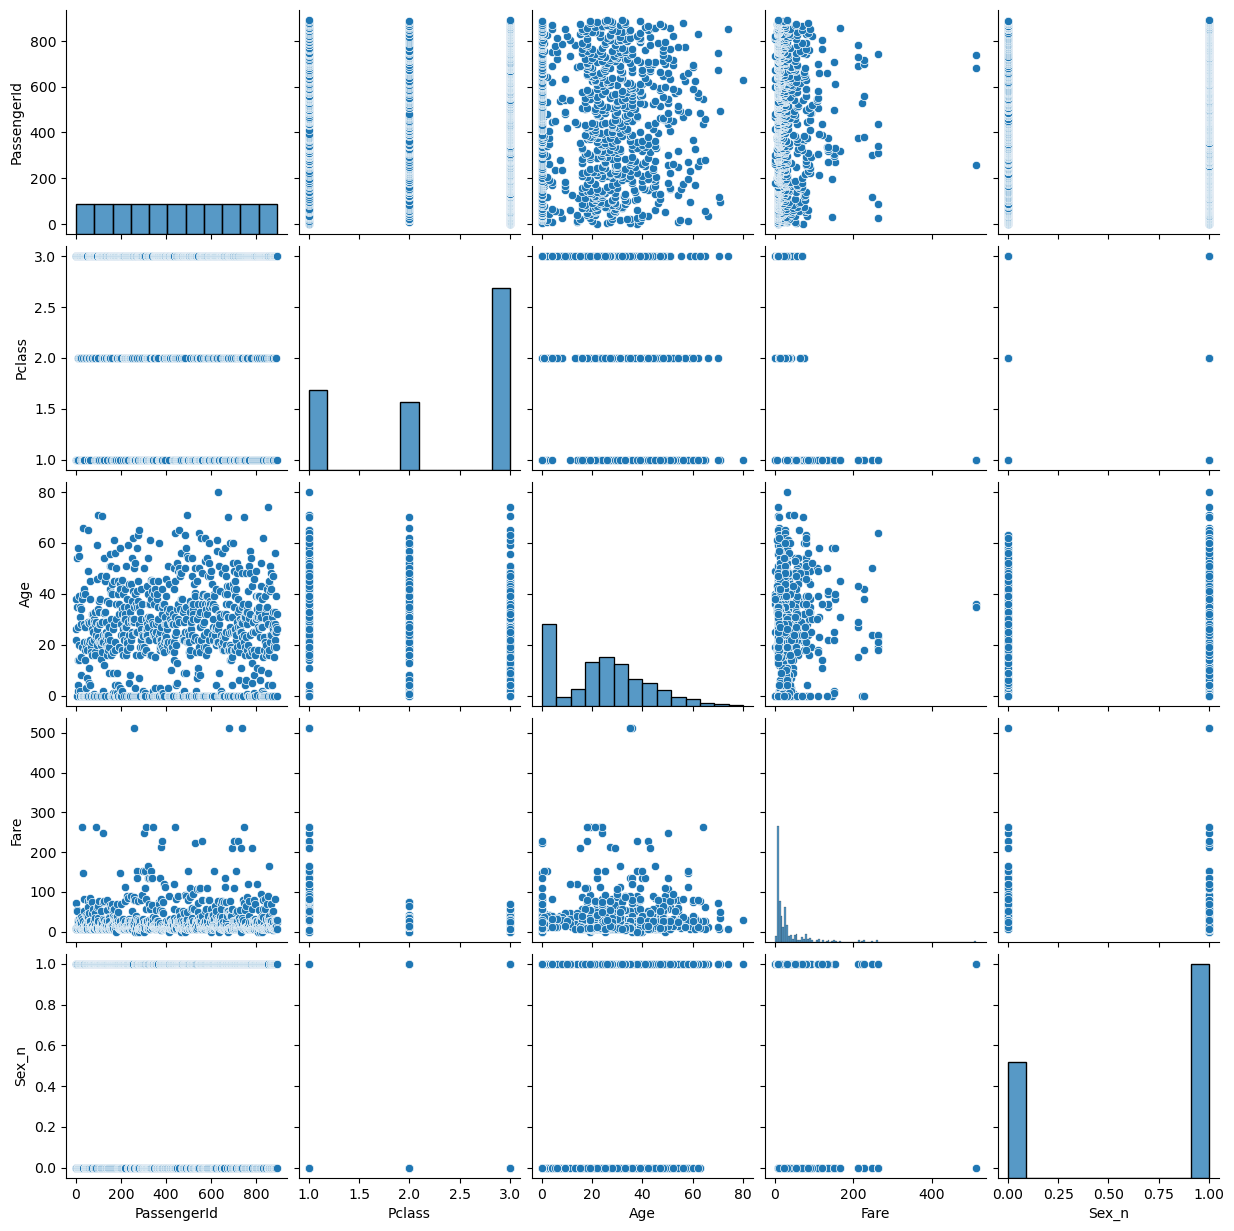

In [21]:
sns.pairplot(feature1)

In [22]:
### Train_Test_Split

x_train,x_test,y_train,y_test=train_test_split(feature1,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 5)
(179, 5)
(712,)
(179,)


In [23]:
### Model Training 

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
accuracy_score(y_test,y_pred)

0.7821229050279329

In [24]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
f1_score(y_test,y_pred)

0.7310344827586207

In [25]:
log_reg.intercept_

array([3.52568291])

In [26]:
log_reg.coef_

array([[ 4.12299217e-05, -1.00943903e+00, -1.38240688e-02,
         1.74527501e-03, -2.51659104e+00]])

In [27]:
### ROC curve

from sklearn.metrics import roc_auc_score,roc_curve

In [28]:
sigmoid=log_reg.predict_proba(x_test)[:,1]

In [29]:
auc_score =roc_auc_score(y_test,sigmoid)
auc_score

np.float64(0.8382051282051283)

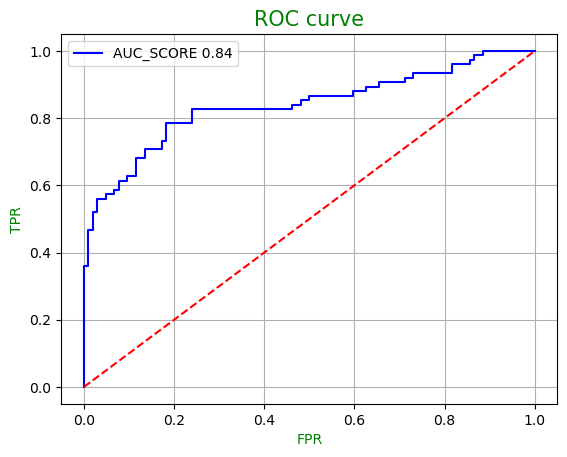

In [30]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,color='b',lw=1.5,label=f'AUC_SCORE {auc_score:.2f}')
plt.plot([0,1],color='r',linestyle='--')
plt.xlabel('FPR',color='g',size=10)
plt.ylabel('TPR',color='green',size=10)
plt.title('ROC curve',color='green',size=15)
plt.legend()
plt.grid()

In [36]:
import pickle 
import streamlit as st

In [38]:
model = pickle.load(open('log.pkl','rb'))
model

LogisticRegression()

In [39]:
import warnings 
warnings.filterwarnings('ignore')
st.title('Model Deployment with Logistic Regression')

2025-09-09 18:13:13.030 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:13:13.613 
  command:

    streamlit run C:\Users\saran\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-09 18:13:13.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [40]:
feature1 = st.number_input("Feature 1", min_value=0.0, max_value=100.0, step=0.1)
feature2 = st.number_input("Feature 2", min_value=0.0, max_value=100.0, step=0.1)
feature3 = st.number_input("Feature 3", min_value=0.0, max_value=100.0, step=0.1)

2025-09-09 18:19:52.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.218 Session state does not function when running a script without `streamlit run`
2025-09-09 18:19:52.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19:52.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:19

In [41]:
features = np.array([[feature1, feature2, feature3]])

In [42]:
if st.button("Predict"):
    prediction = model.predict(features)
    probability = model.predict_proba(features)[:, 1]

    st.write(f'Prediction: **{prediction[0]}**')
    st.write(f'Probability of class 1: **{probability[0]:.2f}**')

2025-09-09 18:20:22.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:20:22.891 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:20:22.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:20:22.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-09 18:20:22.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
